In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
x = np.linspace(0, 50, 501) # linspace 0 to 50 with 501 points
y = np.sin(x)

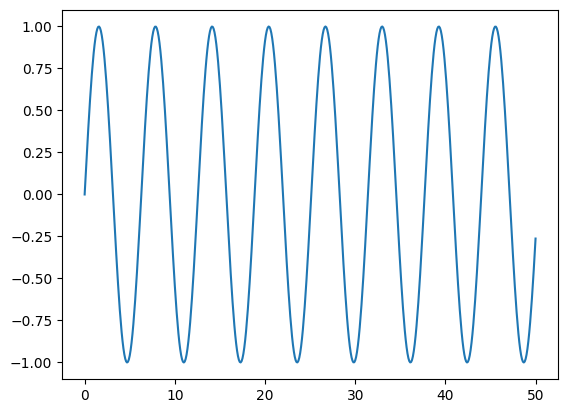

In [16]:
plt.plot(x, y)

In [17]:
df = pd.DataFrame(data=y, index=x, columns=['Sine']) # create a dataframe with the data
print(df)

          Sine
0.0   0.000000
0.1   0.099833
0.2   0.198669
0.3   0.295520
0.4   0.389418
...        ...
49.6 -0.617439
49.7 -0.535823
49.8 -0.448854
49.9 -0.357400
50.0 -0.262375

[501 rows x 1 columns]


In [18]:
test_percent = 0.1
test_point = np.round(len(df) * test_percent)

In [19]:
test_ind = int(len(df) - test_point)

In [20]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(train)
scaled_train = scaler.transform(train)

In [24]:
scaled_test = scaler.transform(test)
